Using decision tree technique

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

#declaring header names
autompg_headers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#read the data using the read_csv class
mpg_data = read_csv('venv/auto_mpg_data.csv', names=autompg_headers)

print(mpg_data.head(5))

#check for any missing data
miss_data = mpg_data[mpg_data.isna().any(axis=1)]
print(miss_data)

#check the data information
print('\n', mpg_data.info())

#since the horsepower has an object data type, we convert it to float
mpg_data['horsepower'] = pd.to_numeric(mpg_data['horsepower'], errors='coerce')

#now lets re check or dataframe for missing values
recheck_missing_data = mpg_data[mpg_data.isna().any(axis=1)]
print('\n These are the instances with missing values after to conversion to float \n', recheck_missing_data )

#using the simpleimputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent') #either replace it with most frequent, median, mean and observe
imputer.fit(mpg_data)
new_data = imputer.transform(mpg_data)

#reassign the new dataframe
mpg_data = pd.DataFrame(data=new_data, columns=autompg_headers)

#seperate the data into X(train) anf y(test) groups - training and target sets
train_headers = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

taret_header = ['mpg']

X = mpg_data[train_headers]
y = mpg_data[taret_header]

#get the independent variables
X = mpg_data.iloc[:, 1:8].values #drop the car name as due to high cardinality and not being strong predictive

#get the mpg
#had to remove the .values as i was getting an error "'numpy.ndarray' object has no attribute 'columns'" in feature importances
y = mpg_data.iloc[:, 0].values

#split the data into 70:30 train and test mode
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#check the dimension of train and test data
print('\n  dimension of train data ', X_train.shape)
print('\n  dimension of test data ', X_test.shape)

#initialise the decision tree model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=1)

#fit the regreession model
dt_model.fit(X_train, y_train)

#predict the model on test data
y_pred = dt_model.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = dt_model.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

#we can check the prediction for specific values
pred_my_value = dt_model.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
--

using another configuration method

In [6]:
#declare SEED variable and set to 1 for reproducibility
SEED = 1


#initialise the decision tree model
dt_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

#fit the regreession model
dt_model.fit(X_train, y_train)

#predict the model on test data
y_pred = dt_model.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = dt_model.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train,y_pred_train)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2 score Train data: ', r2_train)

#we can check the prediction for specific values
pred_my_value = dt_model.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

[17.22248062 32.28493151 17.22248062 32.28493151 17.22248062 17.22248062
 26.08552632 32.28493151 17.22248062 17.22248062 32.28493151 17.22248062
 17.22248062 26.08552632 32.28493151 26.08552632 17.22248062 17.22248062
 17.22248062 32.28493151 26.08552632 26.08552632 17.22248062 26.08552632
 32.28493151 26.08552632 32.28493151 32.28493151 17.22248062 32.28493151
 17.22248062 17.22248062 26.08552632 32.28493151 26.08552632 17.22248062
 26.08552632 17.22248062 32.28493151 26.08552632 26.08552632 26.08552632
 17.22248062 32.28493151 17.22248062 17.22248062 17.22248062 17.22248062
 26.08552632 17.22248062 26.08552632 32.28493151 17.22248062 17.22248062
 26.08552632 26.08552632 17.22248062 17.22248062 26.08552632 32.28493151
 32.28493151 32.28493151 17.22248062 17.22248062 17.22248062 32.28493151
 17.22248062 17.22248062 32.28493151 17.22248062 17.22248062 26.08552632
 17.22248062 32.28493151 17.22248062 26.08552632 32.28493151 17.22248062
 17.22248062 26.08552632 17.22248062 17.22248062 32

    USING ENSEMBLE APPROACH TO CONFIRM STABILITY OD THE MODEL

In [8]:
#decision tree bagging
#importing the necessary packages

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingRegressor

#initialise the decision tree model
dt_model = DecisionTreeRegressor( random_state=1)

#instantiate the bagging regressor
bg = BaggingRegressor(base_estimator=dt_model, n_estimators=50, random_state=0)

#fit bg into the training set
bg.fit(X_train, y_train)

#predict the model on test data
y_pred = bg.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = bg.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train,y_pred_train)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2 score Train data: ', r2_train)

#we can check the prediction for specific values
pred_my_value = bg.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

[20.7   27.216 16.95  22.976 20.278 14.834 29.048 38.216 16.372 12.67
 30.828 17.352 18.964 24.612 37.014 20.852 14.06  20.48  12.46  38.88
 23.42  30.422 21.128 26.56  26.326 27.468 32.52  39.388 17.21  29.028
 24.358 13.8   20.572 23.386 24.726 14.17  26.274 12.8   33.228 24.158
 26.53  24.048 17.768 34.246 24.392 19.872 17.402 14.38  27.08  17.542
 26.5   24.526 15.53  13.63  29.382 24.09  12.98  14.53  31.76  36.33
 35.098 36.468 15.272 25.894 16.316 35.068 25.446 24.46  31.106 14.04
 16.72  23.776 15.504 27.874 14.8   26.53  29.84  15.176 14.71  23.666
 18.36  15.896 37.09  24.804 38.996 17.364 16.14  20.298 37.81  32.438
 16.88  20.046 18.708 26.932 29.07  19.462 38.88  27.058 22.478 25.52
 18.798 12.72  14.32  40.722 14.754 19.266 35.404 22.584 28.274 15.186
 16.36  32.744 33.528 16.872 23.914 33.518 13.14  23.182 23.306 37.162]
mae:  1.92
mse:  7.31
Root mean square error:  2.70
R2 score:  0.8749384097822802
R2 score Train data:  0.9817855814888954
This is the prediction  [20.7

USING RANDOMM FOREST TECHNIQUE

In [9]:
#decision tree bagging
#importing the necessary packages

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

#initialise random forest model
rf_model = RandomForestRegressor(n_estimators=25, random_state=2)

#fit rf into the training set
rf_model.fit(X_train, y_train)

#predict the model on test data
y_pred = rf_model.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = rf_model.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train,y_pred_train)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2 score Train data: ', r2_train)

#we can check the prediction for specific values
pred_my_value = rf_model.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

[20.592 27.764 17.34  21.96  21.52  15.04  27.804 36.604 16.588 12.76
 32.48  16.508 18.964 23.464 36.384 21.436 14.12  20.58  12.56  39.184
 23.548 29.988 22.184 26.76  27.588 27.364 33.072 39.636 16.88  27.836
 24.452 14.08  20.964 24.04  24.6   13.86  26.012 12.64  32.792 24.032
 26.312 23.448 18.396 34.464 24.332 20.348 17.54  14.02  26.98  17.756
 26.76  25.484 15.46  13.34  29.488 24.052 13.08  14.34  30.86  36.104
 35.172 36.132 15.708 25.808 16.032 34.624 26.964 23.86  32.692 14.22
 17.212 24.34  16.128 28.368 14.52  26.476 29.9   16.108 14.78  24.04
 17.768 16.836 39.28  25.    39.308 17.752 16.612 20.34  36.548 31.988
 16.744 20.016 17.588 26.496 29.14  19.724 40.124 27.176 22.368 25.844
 18.2   12.68  14.16  40.792 15.508 19.664 35.06  21.46  28.012 16.108
 16.9   32.704 30.832 16.992 23.9   33.08  13.2   22.988 22.532 37.672]
mae:  2.01
mse:  7.40
Root mean square error:  2.72
R2 score:  0.8734011952338309
R2 score Train data:  0.979378827781849
This is the prediction  [20.

RANDOM FOREST FOR FEATURES IMPORTANCE

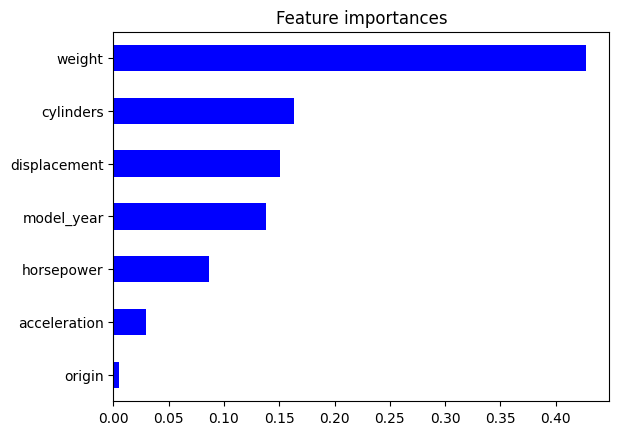

In [16]:
#visualise feature importance
#create a pd.series of feature importance

importances = pd.Series(data=rf_model.feature_importances_, index=X_train.columns)

#sort base don prediction importances
importances_sorted = importances.sort_values()

#draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.show()


USING ADABOOSTING TECHNIQUES

In [19]:
#ADAPTIVE BOOSTING
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

#initialise the decision tree model
dt_model = DecisionTreeRegressor(max_depth=2, random_state=1)

#instantiate the Adaboosting regressor
ada = AdaBoostRegressor(base_estimator=dt_model, n_estimators=180, random_state=1)

#fit ada into the training set
ada.fit(X_train, y_train)

#predict the model on test data
y_pred = ada.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = ada.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train,y_pred_train)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2 score Train data: ', r2_train)

#we can check the prediction for specific values
pred_my_value = ada.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

[19.80347222 29.11395349 19.01826923 25.45352113 22.53030303 18.13157895
 28.97058824 39.89861111 17.72777778 16.328      30.09216867 18.54025974
 19.24347826 26.67653061 39.49883721 20.85918367 16.328      18.1516129
 16.328      39.3372549  22.84615385 29.20483092 24.57352941 24.57352941
 28.25       28.97058824 31.76590909 39.74027778 16.75873016 28.74186047
 28.8512987  16.328      20.4375     27.6530303  26.35714286 16.36792453
 27.04714286 16.328      30.12394366 26.2875     26.12093023 26.35714286
 20.84193548 30.81578947 27.40285714 19.68765432 18.81176471 16.328
 26.36585366 18.08507463 24.57352941 28.18461538 17.62403846 16.36792453
 29.06929134 23.22222222 16.27142857 16.328      29.60493827 38.925
 35.88333333 38.925      18.1516129  28.35159236 20.72222222 30.39893617
 28.18227848 29.06929134 29.93806452 16.36792453 20.72222222 25.45352113
 16.69324324 28.21287879 16.328      26.35714286 33.37578947 18.13157895
 16.71568627 22.77083333 21.03655914 17.80185185 38.32307692 2

Gradient Boosting Ensembling technique

In [23]:
#ADAPTIVE BOOSTING
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#initialise the decision tree model
dt_model = DecisionTreeRegressor(max_depth=2, random_state=1)

#instantiate the Adaboosting regressor
grd = GradientBoostingRegressor(n_estimators=200, random_state=1, max_depth=4)

#fit ada into the training set
grd.fit(X_train, y_train)

#predict the model on test data
y_pred = grd.predict(X_test)
print(y_pred)

#predict the model on train data
y_pred_train = grd.predict(X_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train,y_pred_train)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2 score Train data: ', r2_train)

#we can check the prediction for specific values
pred_my_value = grd.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')

[21.17776545 26.6350864  16.8954886  21.658619   20.91991605 15.30164494
 29.50296737 35.48514852 16.64707959 12.58601678 29.92640571 18.22381567
 18.18947351 24.94434249 37.23981126 21.68936309 13.95433874 20.40085224
 12.69217425 38.11902032 24.10150019 30.69258257 21.93478093 27.15601196
 24.46484733 26.664731   32.02172148 38.21797142 17.39413887 30.59462427
 24.61636918 14.06530838 19.16652256 25.55741009 25.03173512 13.68504681
 26.58935983 12.68177541 39.31929601 24.32355445 26.65384767 22.26204551
 19.16435028 34.05103547 25.34487482 19.28361816 17.92031609 13.83697396
 27.16422771 17.60446542 27.15601196 25.47642899 15.38530564 13.05573407
 29.48690616 23.75157998 13.59583849 14.05974086 30.98192821 33.49299015
 31.07294446 32.80391215 16.48690617 26.95773688 16.77016243 36.47481699
 31.62229533 24.02063793 30.26179149 13.49722106 17.96520905 24.29472329
 15.32604454 28.19746998 14.79077451 27.41252588 28.89744758 16.56406959
 15.04754397 23.17948251 18.10750153 17.92838487 37